<a href="https://colab.research.google.com/github/epicalekspwner/BigScaleAnalytics2021/blob/main/Functions_with_initial_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries and lists

In [ ]:
#Libraries

import pandas as pd
import re
import string
from collections import Counter
import itertools
from collections import OrderedDict

In [ ]:
pip install spacy-lefff

     |████████████████████████████████| 3.0MB 6.0MB/s 
     |████████████████████████████████| 12.8MB 310kB/s 
     |████████████████████████████████| 460kB 45.0MB/s 
     |████████████████████████████████| 1.1MB 48.5MB/s 
     |████████████████████████████████| 9.1MB 50.5MB/s 
     |████████████████████████████████| 122kB 54.5MB/s 
  Created wheel for spacy-lefff: filename=spacy_lefff-0.4.0-cp37-none-any.whl size=2929893 sha256=f2f0a6e16e6875795a1f52b72884756dba0c9fe51322d3852480193540a83ef9
  Stored in directory: /root/.cache/pip/wheels/5c/1c/f0/9b95e4e74005afbfe54aa126484febacf0fd27feffa3e9ad45
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=c5eca0cf3a3f58d68537c1e39b1ea351ccb69d25b8754b22b2e03b6854a6b237
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built spacy-lefff smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
     

In [ ]:
# Spacy library

!python -m spacy download fr_core_news_md

from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import spacy
from spacy_lefff import LefffLemmatizer
from spacy.language import Language

nlp = spacy.load("fr_core_news_md")

2021-04-12 19:52:21.465994: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 47.4MB 97kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [ ]:
# NLTK --> Stemming

from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

stemmer = PorterStemmer()
stemmerfr = SnowballStemmer("french")

In [ ]:
pip install deep-translator

In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
# Special lists/dict of char

liste_special_letters = ['é','è','ê','ë','à','ä','â','ï','î','ö','ô','ü','ù','û','ç']
contractions_dict = { "d'": "de ","n'":"ne ","l'":"le ","s'":"se ","c'":"ce ","j'":"je ","t'":"tu ","qu'":"que "}
stopWord = ['le','la','les','de','des','se','ce','à']
Fr_stp_modif = {'a', 'abord', 'afin', 'ah', 'ai', 'aie', 'ainsi',
 'alors', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 
 'assez',  'au', 'aucun', 'aucune', 'aujourd', "aujourd'hui", 'aupres',
 'auquel', 'aussi', 'autre', 'autrement', 'autres', 'autrui',
 'aux',  'auxquelles', 'auxquels',  'avant', 'avec',  'bas', 'basee', 'car', 'ce', 'ceci',
 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui',
 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 'cet', 'cette', 'ceux',
 'ceux ci', 'ceux là', 'chacun', 'chacune', 'chaque', 'chez', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième',
 'combien', 'comme', 'comment', 'compris', 'concernant', 'da', 'dans', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'depuis',
 'derriere', 'derrière', 'des', 'desormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant',
 'devers', 'devra', 'different', 'differentes', 'differents', 'différent', 'différente', 'différentes', 'différents', 'dire', 'directe',
 'directement', 'divers', 'diverse', 'diverses', 'dix', 'dix huit', 'dix neuf', 'dix sept', 'dixième', 'donc', 'dont', 'douze',
 'douzième', 'du', 'duquel', 'durant','dès', 'désormais', 'effet','egale', 'egalement', 'egales', 'eh', 'elle', 'elle même',
 'elles', 'elles mêmes', 'en', 'encore', 'enfin', 'entre','envers', 'environ','et', 'etc', 'eux', 'eux mêmes',
 'exactement',
 'excepté',
  'chat'
  'chien'
 'façon',

 'gens',
 'ha',
 'hem',
 'hep',
 'hi',
 'ho',
 'hormis',
 'hors',
 'hou',
 'houp',
 'hue',
 'hui',
 'huit',
 'huitième',
 'hé',
 'i',
 'il',
 'ils',
 'importe',
 "j ",
 'je',
 'jusqu',
 'jusque',
 'juste',
 'j ',
 "l ",
 'la',
 'laquelle',
 'le',
 'lequel',
 'les',
 'lesquelles',
 'lesquels',
 'leur',
 'leurs',
 'longtemps',
 'lors',
 'lorsque',
 'lui',
 'lui meme',
 'lui même',
 'là',
 'lès',
 'l ',
 "m ",
 'ma',
 'maint',
 'maintenant',
 'mais',
 'malgré',
 'me',
 'meme',
 'memes',
 'merci',
 'mes',
 'mien',
 'mienne',
 'miennes',
 'miens',
 'mille',
 'moi',
 'moi meme',
 'moi même',
 'moindres',
 'moins',
 'mon',
 'même',
 'mêmes',
 'm ',
 "n ",
 'na',
 'ne',
 'neanmoins',
 'neuvième',
 'ni',
 'nombreuses',
 'nombreux',
 'nos',
 'notamment',
 'notre',
 'nous',
 'nous-mêmes',
 'nouvea',
 'nul',
 'néanmoins',
 'nôtre',
 'nôtres',
 'n’',
 'o',
 'on',
 
 'onze',
 'onzième',
 'ore',
 'ou',
 'ouias',
 'oust',
 'outre',

 'ouverte',
 'ouverts',
 'où',
 'par',
 'parce',
 'parfois',
 'parmi',
 'parseme',
 'partant',
 'pas',
 'pendant',
 'pense',
 'permet',
 'personne',
 'peu',

 'plus',
 'plusieurs',
 'plutôt',
 'possible',
 'possibles',
 'pour',
 'pourquoi',

 'prealable',
 'precisement',
 'premier',
 'première',
 'premièrement',
 'pres',
 'procedant',
 'proche',
 'près',
 'pu',
 'puis',
 'puisque',
 "qu'",
 'quand',
 'quant',
 'quant à soi',
 'quanta',
 'quarante',
 'quatorze',
 'quatre',
 'quatre vingt',
 'quatrième',
 'quatrièmement',
 'que',
 'quel',
 'quelconque',
 'quelle',
 'quelles',
 "quelqu'un",
 'quelque',
 'quelques',
 'quels',
 'qui',
 'quiconque',
 'quinze',
 'quoi',
 'quoique',
 'qu’',
 'relative',
 'relativement',
 

 'retour',
 'revoici',
 'revoilà',
 "s ",
 'sa',
 'sait',
 'sans',
 'sauf',
 'se',
 'seize',
 'selon',
 'semblable',
 'semblaient',
 'semble',
 'semblent',
 'sent',
 'sept',
 'septième',

 'ses',
 'seul',
 'seule',
 'seulement',
 'si',
 'sien',
 'sienne',
 'siennes',
 'siens',
 'sinon',
 'six',
 'sixième',
 'soi',
 'soi même',
 'soit',
 'soixante',
 'son',

 'sous',
 'souvent',
 'specifique',
 'specifiques',
 'stop',
 'suffisant',
 'suffisante',

 'suivant',
 'suivante',
 'suivantes',
 'suivants',
 'suivre',
 'sur',
 'surtout',
 's ',
 "t ",
 'ta',
 'tant',
 'te',
 'tel',
 'telle',
 'tellement',
 'telles',
 'tels',
 'tenant',

 'tente',
 'tes',
 'tien',
 'tienne',
 'tiennes',
 'tiens',
 'toi',
 'toi-même',
 'ton',
 'touchant',
 'toujours',
 'tous',
 'tout',
 'toute',
 'toutes',
 'treize',
 'trente',
 'tres',
 'trois',
 'troisième',
 'troisièmement',
 'tu',
 'té',
 't ',
 'un',
 'une',
 'unes',
 'uns',
 'va',
 'vais',
 'vas',
 'vers',
 'via',
 'vingt',
 'voici',
 'voilà',
 'vont',
 'vos',
 'votre',
 'vous',
 'vous mêmes',
 'vu',
 'vé',
 'vôtre',
 'vôtres',
 'à',
 'â',
 'ça',
 'ès',
 'ô'}



## 2/ Data cleaning

### Cleaning

In [ ]:
# Dataframe import

Phrases = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/Phrasee.txt', delimiter = "\t")
Niveau = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/Niveau.txt', delimiter = "\t" )
df = pd.DataFrame()

df['Level'] = Niveau['Type (Maxime)']
df['Sentences'] = Phrases['Phrases']

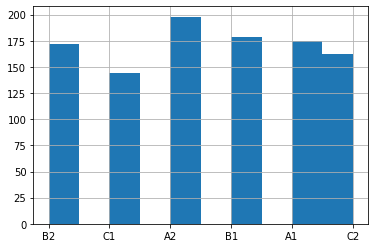

In [ ]:
# Outliers?

df['Level'].hist()

In [ ]:
# Data cleaning 1 --> char replacement + lower

df['Sentences'] = df['Sentences'].apply(lambda x: x.replace("’","'"))
df['Sentences'] = df['Sentences'].apply(lambda x: x.lower())


#-------------------------------------------------------------------------------


# Data cleaning 2 --> Contractions expanding

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

    # Function for expanding contractions

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

df['Cleaning1'] = df['Sentences'].apply(lambda x: expand_contractions(x))


#-------------------------------------------------------------------------------


# Data cleaning 3 --> Punctuation removal

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['Cleaning2'] = df['Cleaning1'].apply(lambda x: punctuation_removal(x))


#-------------------------------------------------------------------------------


# Data cleaning 4 --> Remove special char (took into account french special char e.g. "ç","é")

def bin_spe(tweet):
    tweet = ' '.join(re.sub("[^0-9a-zÀ-ÿ-A-Z-ç \t]"," ", tweet).split())
    return tweet

df['Cleaning3'] = df['Cleaning2'].apply(lambda x: bin_spe(x))


#-------------------------------------------------------------------------------


# Data cleaning 5 --> Stop words removal

def stopword_removal(text):
    all_list = [char for char in text if char not in stopWord]
    clean_str = ''.join(all_list)
    return clean_str

df['Cleaning3'] = df['Cleaning2'].apply(lambda x: stopword_removal(x))


#-------------------------------------------------------------------------------


# Data cleaning 6 --> remove alone letter and words with len() ==2

def remove_alone_letters_and_len2(texte):
    texte = ' '.join(i for i in texte.split() if not len(i) == 1 and not len(i) == 2)
    return texte

df['Cleaning4'] = df['Cleaning3'].apply(lambda x: remove_alone_letters_and_len2(x))

## 3/ Leff and lemma

In [ ]:
df1 = pd.DataFrame()
df1['sentences_cleaned'] = df['Cleaning4']
df1['Level'] = df['Level']

In [ ]:
# Count top 100 words whole dataset

Counter(" ".join(df1["sentences_cleaned"]).split()).most_common(100)


#-------------------------------------------------------------------------------


# Lemmatization --> OUTPUT: Token

def lemma_french_token(text):
  doc = nlp(text)
  liste1 = []
  for token in doc:
     liste1.append(token.lemma_)
  return liste1

df1['lemma'] = df1['sentences_cleaned'].apply(lambda x: lemma_french_token(x))


#-------------------------------------------------------------------------------


# Lemmatization --> OUTPUT: sentence

def lemma_french_full_sentence(text):
  doc = nlp(text)
  lemmatized_output = ' '.join([w.lemma_ for w in doc])
  return lemmatized_output

df1['lemma'] = df1['sentences_cleaned'].apply(lambda x: lemma_french_full_sentence(x))


#-------------------------------------------------------------------------------


# Count to 100 words after lemma whole dataset

Top_100_lemma = Counter(" ".join(df1["lemma"]).split()).most_common(100)


#-------------------------------------------------------------------------------


# Get a list of the top 100 words in the dataset

def count_to_list(my_list_count_100):
  list2 = []
  for my_tuple in my_list_count_100:
      list2.append(my_tuple[0])
  return list2

List_top_100 = count_to_list(Top_100_lemma)


List_top_100

# Data cleaning 7 --> Common word removal

def common_word_removal(text):

    all_list =  " ".join([word for word in text.split() if word not in List_top_100])
    
    return all_list

df1['Cleaning7'] = df1['lemma'].apply(lambda x: common_word_removal(x))


#-------------------------------------------------------------------------------


def List_STP_word_removal(text):

    all_list =  " ".join([word for word in text.split() if word not in Fr_stp_modif])
    
    return all_list

df1['Cleaning8'] = df1['Cleaning7'].apply(lambda x: List_STP_word_removal(x))


#-------------------------------------------------------------------------------

In [ ]:
# POS_LEFFF

def POS_french_token(sentences):
    dict1 = {}
    doc = nlp(sentences)
    for token in doc:
      dict1.update({token.text : token.pos_})
    return dict1

# df1['POS_LEFFF'] = df1['Cleaning8'].apply(lambda x: POS_french_token(x))

df1['POS_LEFFF2'] = df1['lemma'].apply(lambda x: POS_french_token(x))


#-------------------------------------------------------------------------------

In [ ]:
# Get a list from dict with all the verbs

def get_dict_value_verb(POS_dict):
    
    liste_verb =[]

    for key, value in POS_dict.items():
     
      if value == 'VERB':
        liste_verb.append(key)
    return liste_verb


df1['Listes_verb'] = df1['POS_LEFFF2'].apply(lambda x: get_dict_value_verb(x))


#-------------------------------------------------------------------------------


# Get a liste from dict with all the nouns


def get_dict_value_noun(POS_dict):
    
    liste_noun =[]

    for key, value in POS_dict.items():
     
      if value == 'NOUN':
        liste_noun.append(key)
    return liste_noun


df1['Listes_noun'] = df1['POS_LEFFF2'].apply(lambda x: get_dict_value_noun(x))


#-------------------------------------------------------------------------------

In [ ]:
# Transform list of list into one single list + remove duplicate nouns


liste_noun = df1['Listes_noun'].tolist()
flat_list_noun = list(itertools.chain(*liste_noun))
flat_list_noun = sorted(flat_list_noun,reverse=True)
flat_list_noun = list(OrderedDict.fromkeys(flat_list_noun))


#-------------------------------------------------------------------------------


liste_verb = df1['Listes_verb'].tolist()
flat_list_verb = list(itertools.chain(*liste_verb))
flat_list_verb = sorted(flat_list_verb,reverse=True)
flat_list_verb = list(OrderedDict.fromkeys(flat_list_verb))


#-------------------------------------------------------------------------------

In [ ]:
# Similarity check

import difflib

def stem_checker(stem1,stem2):

  sequence = round(difflib.SequenceMatcher(None,stem1,stem2).ratio()*100)
  return sequence 

# https://www.kite.com/python/docs/difflib.SequenceMatcher

#-------------------------------------------------------------------------------

### Part 1) Translate, suffixes, similarity

In [ ]:
# Get all the nouns that finish with a specific suffixe

liste_tion = [w for w in flat_list_noun if w.endswith('tion')]
liste_ien = [w for w in flat_list_noun if w.endswith('ien')]
liste_ienne = [w for w in flat_list_noun if w.endswith('ienne')]
liste_e = [w for w in flat_list_noun if w.endswith('é')]
liste_ite = [w for w in flat_list_noun if w.endswith('ite')]
liste_isme = [w for w in flat_list_noun if w.endswith('isme')]
liste_ment = [w for w in flat_list_noun if w.endswith('ment')]
liste_eur = [w for w in flat_list_noun if w.endswith('eur')]


#-------------------------------------------------------------------------------


# Get all the verbs that finish with a specific suffixe

liste_er = [w for w in flat_list_verb if w.endswith('er')]


#-------------------------------------------------------------------------------

In [ ]:
# English words upload

df_eng_words = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/Eng_Frenche.csv', delimiter = "\t")
df_eng_words['aardvark'] = df_eng_words['aardvark'].apply(lambda x : str(x))
Liste_eng_words = df_eng_words.values.tolist()
Liste_eng_words = list(itertools.chain(*Liste_eng_words))

#-------------------------------------------------------------------------------


liste_eng_tion = [w for w in Liste_eng_words if w.endswith('tion')]
'''
liste_eng_able = [w for w in Liste_eng_words if w.endswith('able')]
liste_eng_ate = [w for w in Liste_eng_words if w.endswith('ate')]
liste_eng_y = [w for w in Liste_eng_words if w.endswith('y')]

liste_eng_ary = [w for w in Liste_eng_words if w.endswith('ary')]
liste_eng_or = [w for w in Liste_eng_words if w.endswith('or')]
liste_eng_a = [w for w in Liste_eng_words if w.endswith('a')]

liste_eng_e = [w for w in Liste_eng_words if w.endswith('e')]
liste_eng_ish = [w for w in Liste_eng_words if w.endswith('ish')]
liste_eng_c = [w for w in Liste_eng_words if w.endswith('c')]

liste_eng_t = [w for w in Liste_eng_words if w.endswith('t')]
liste_eng_k = [w for w in Liste_eng_words if w.endswith('k')] '''

#-------------------------------------------------------------------------------


"\nliste_eng_able = [w for w in Liste_eng_words if w.endswith('able')]\nliste_eng_ate = [w for w in Liste_eng_words if w.endswith('ate')]\nliste_eng_y = [w for w in Liste_eng_words if w.endswith('y')]\n\nliste_eng_ary = [w for w in Liste_eng_words if w.endswith('ary')]\nliste_eng_or = [w for w in Liste_eng_words if w.endswith('or')]\nliste_eng_a = [w for w in Liste_eng_words if w.endswith('a')]\n\nliste_eng_e = [w for w in Liste_eng_words if w.endswith('e')]\nliste_eng_ish = [w for w in Liste_eng_words if w.endswith('ish')]\nliste_eng_c = [w for w in Liste_eng_words if w.endswith('c')]\n\nliste_eng_t = [w for w in Liste_eng_words if w.endswith('t')]\nliste_eng_k = [w for w in Liste_eng_words if w.endswith('k')] "

In [ ]:
from google.colab import files

liste_eng_tion = [w for w in Liste_eng_words if w.endswith('tion')]
ENG_tion = pd.DataFrame(liste_eng_tion,columns=['ENG_tion'])
ENG_tion['FR_tion'] = ENG_tion['ENG_tion'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_tion['eng_stem'] = ENG_tion['ENG_tion'].apply(lambda x: stemmer.stem(x))
ENG_tion['fr_stem'] = ENG_tion['FR_tion'].apply(lambda x: stemmerfr.stem(x))
ENG_tion['ratio_similarity'] = ENG_tion.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)


ENG_tion.to_excel("ENG_tion.xls")
files.download('ENG_tion.xls')


In [ ]:
'''ENG_able = pd.DataFrame(liste_eng_able,columns=['ENG_able'])
ENG_able['FR_able'] = ENG_able['ENG_able'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_able['eng_stem'] = ENG_able['ENG_able'].apply(lambda x: stemmer.stem(x))
ENG_able['fr_stem'] = ENG_able['FR_able'].apply(lambda x: stemmerfr.stem(x))
ENG_able['ratio_similarity'] = ENG_able.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)

ENG_able.to_excel("ENG_able.xls")
files.download('ENG_able.xls')

ENG_ate = pd.DataFrame(liste_eng_ate,columns=['ENG_ate'])
ENG_ate['FR_ate'] = ENG_ate['ENG_ate'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_ate['eng_stem'] = ENG_ate['ENG_ate'].apply(lambda x: stemmer.stem(x))
ENG_ate['fr_stem'] = ENG_ate['FR_ate'].apply(lambda x: stemmerfr.stem(x))
ENG_ate['ratio_similarity'] = ENG_ate.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)


ENG_ate.to_excel("ENG_ate.xls")
files.download('ENG_ate.xls')

ENG_y = pd.DataFrame(liste_eng_y,columns=['ENG_y'])
ENG_y['FR_y'] = ENG_y['ENG_y'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_y['eng_stem'] = ENG_y['ENG_y'].apply(lambda x: stemmer.stem(x))
ENG_y['fr_stem'] = ENG_y['FR_y'].apply(lambda x: stemmerfr.stem(x))
ENG_y['ratio_similarity'] = ENG_y.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)


ENG_y.to_excel("ENG_y.xls")
files.download('ENG_y.xls')

ENG_ary = pd.DataFrame(liste_eng_ary,columns=['ENG_ary'])
ENG_ary['FR_ary'] = ENG_ary['ENG_ary'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_ary['eng_stem'] = ENG_ary['ENG_ary'].apply(lambda x: stemmer.stem(x))
ENG_ary['fr_stem'] = ENG_ary['FR_ary'].apply(lambda x: stemmerfr.stem(x))
ENG_ary['ratio_similarity'] = ENG_ary.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)


ENG_ary.to_excel("ENG_ary.xls")
files.download('ENG_ary.xls')


ENG_or = pd.DataFrame(liste_eng_or,columns=['ENG_or'])
ENG_or['FR_or'] = ENG_or['ENG_or'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_or['eng_stem'] = ENG_or['ENG_or'].apply(lambda x: stemmer.stem(x))
ENG_or['fr_stem'] = ENG_or['FR_or'].apply(lambda x: stemmerfr.stem(x))
ENG_or['ratio_similarity'] = ENG_or.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)


ENG_or.to_excel("ENG_or.xls")
files.download('ENG_or.xls')


ENG_a = pd.DataFrame(liste_eng_a,columns=['ENG_a'])
ENG_a['FR_a'] = ENG_a['ENG_a'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_a['eng_stem'] = ENG_a['ENG_a'].apply(lambda x: stemmer.stem(x))
ENG_a['fr_stem'] = ENG_a['FR_a'].apply(lambda x: stemmerfr.stem(x))
ENG_a['ratio_similarity'] = ENG_a.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)


ENG_a.to_excel("ENG_a.xls")
files.download('ENG_a.xls')


ENG_e = pd.DataFrame(liste_eng_e,columns=['ENG_e'])
ENG_e['FR_e'] = ENG_e['ENG_e'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_e['eng_stem'] = ENG_e['ENG_e'].apply(lambda x: stemmer.stem(x))
ENG_e['fr_stem'] = ENG_e['FR_e'].apply(lambda x: stemmerfr.stem(x))
ENG_e['ratio_similarity'] = ENG_e.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)



ENG_e.to_excel("ENG_e.xls")
files.download('ENG_e.xls')



ENG_ish = pd.DataFrame(liste_eng_ish,columns=['ENG_ish'])
ENG_ish['FR_ish'] = ENG_ish['ENG_ish'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_ish['eng_stem'] = ENG_ish['ENG_ish'].apply(lambda x: stemmer.stem(x))
ENG_ish['fr_stem'] = ENG_ish['FR_ish'].apply(lambda x: stemmerfr.stem(x))
ENG_ish['ratio_similarity'] = ENG_ish.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)



ENG_ish.to_excel("ENG_ish.xls")
files.download('ENG_ish.xls')

ENG_t = pd.DataFrame(liste_eng_t,columns=['ENG_t'])
ENG_t['FR_t'] = ENG_t['ENG_t'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_t['eng_stem'] = ENG_t['ENG_t'].apply(lambda x: stemmer.stem(x))
ENG_t['fr_stem'] = ENG_t['FR_t'].apply(lambda x: stemmerfr.stem(x))
ENG_t['ratio_similarity'] = ENG_t.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)


ENG_t.to_excel("ENG_t.xls")
files.download('ENG_t.xls')

ENG_k = pd.DataFrame(liste_eng_k,columns=['ENG_k'])
ENG_k['FR_k'] = ENG_k['ENG_k'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))
ENG_k['eng_stem'] = ENG_k['ENG_k'].apply(lambda x: stemmer.stem(x))
ENG_k['fr_stem'] = ENG_k['FR_k'].apply(lambda x: stemmerfr.stem(x))
ENG_k['ratio_similarity'] = ENG_k.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)


ENG_k.to_excel("ENG_k.xls")
files.download('ENG_k.xls')

'''

In [ ]:
# Translate into english the list of words ending with specific suffixes

'''
ENG_tion = pd.DataFrame(liste_eng_tion,columns=['ENG_tion'])
ENG_tion['FR_tion'] = ENG_tion['ENG_tion'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))

ENG_tion['eng_stem'] = ENG_tion['ENG_tion'].apply(lambda x: stemmer.stem(x))
ENG_tion['fr_stem'] = ENG_tion['FR_tion'].apply(lambda x: stemmerfr.stem(x))

ENG_tion['ratio_similarity'] = ENG_tion.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)
df_words_tion_low_similarity = ENG_tion.loc[(ENG_tion['ratio_similarity'] > 0) & (ENG_tion['ratio_similarity'] < 60)]
df_words_tion_high_similarity = ENG_tion.loc[ENG_tion['ratio_similarity'] > 70 ]

from google.colab import files

ENG_tion.to_excel("eng_fr.xls")
files.download('eng_fr.xls')

# Translate into english the list of words ending with specific suffixes

tion = pd.DataFrame(liste_tion,columns=['tion_fr'])
tion['eng'] = tion['tion_fr'].apply(lambda x: GoogleTranslator(source='fr', target='en').translate(x))


#-------------------------------------------------------------------------------


# Apply stemming to both French and English nouns and see if root is the same

tion['eng_stem'] = tion['eng'].apply(lambda x: stemmer.stem(x))
tion['fr_stem'] = tion['tion_fr'].apply(lambda x: stemmerfr.stem(x))


'''


### Part 2) Upload df

In [ ]:
main_df= pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/MAINDF_.txt', delimiter = "\t")
main_df

,ENG,FR,eng_stem,fr_stem,ratio_similarity
0,aback,décontenancé,aback,décontenanc,25
1,airlock,sas,airlock,sas,20
2,airsick,le mal de l'air,airsick,le mal de l'air,27
3,alack,un manque,alack,un manqu,15
4,amok,amok,amok,amok,100
...,...,...,...,...,...
15606,vocation,vocation,vocat,vocat,100
15607,volition,volition,volit,volit,100
15608,westernisation,occidentalisation,westernis,occidentalis,38
15609,workstation,poste de travail,workstat,poste de travail,33


In [ ]:
main_df = main_df.drop_duplicates()
main_dict = dict(zip(main_df.FR,main_df.ratio_similarity))
main_dict

## DECEPTIVE COGNOMES


In [ ]:
main_Dcognomes= pd.read_csv('https://raw.githubusercontent.com/mbayle98/S2_project/main/BIGSCALE/Cognomes_df.txt', delimiter = "\t")

In [ ]:
main_Dcognomes= pd.read_csv('https://raw.githubusercontent.com/mbayle98/S2_project/main/BIGSCALE/Cognomes_df.txt', delimiter = "\t")

main_Dcognomes['eng_stem'] = main_Dcognomes['English'].apply(lambda x: stemmer.stem(x))
main_Dcognomes['fr_stem'] = main_Dcognomes['Français'].apply(lambda x: stemmerfr.stem(x))
main_Dcognomes['ratio_similarity'] = main_Dcognomes.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)

main_Dcognomes_dict = dict(zip(main_Dcognomes.Français,main_Dcognomes.ratio_similarity))
main_Dcognomes_dict

In [ ]:
main_Dcognomes_dict = dict(zip(main_Dcognomes.Français,main_Dcognomes.ratio_similarity))
main_Dcognomes_dict

In [ ]:
Phrase ="Aujourd'hui j'ai fait de la géométrie, nous avons basique solide étudié la translation d'un plan, mon professeur nous surveillait et nous donnait des avis sur notre travail du jour"

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
def Check_Dcognomes(sentences):
    sentence_clean = ""
    lemm_sentence = lemma_french_token(sentences)
    doc = TreebankWordDetokenizer().detokenize(lemm_sentence)
    doc = nlp(doc)

    for token in doc:
      if token.pos_ == 'NOUN'or token.pos_ == 'VERB' or token.pos_ =='ADJ':
        sentence_clean = sentence_clean + ' ' + token.text
      
    nb_Dcognomes = 0
    sentence = sentence_clean.split()
    for i in sentence:
      if i in main_Dcognomes_dict:
        nb_Dcognomes = nb_Dcognomes + 1
    
    return nb_Dcognomes
  
df1['Nb_Dcognomes'] = df1['lemma'].apply(lambda x: Check_Dcognomes(x))

In [ ]:
def count_DeceptiveCognome_and_similarity_score(sentences):

  sentence_clean = ""
  lemm_sentence = lemma_french_token(sentences)
  doc = TreebankWordDetokenizer().detokenize(lemm_sentence)
  doc = nlp(doc)

  for token in doc:
    if token.pos_ == 'NOUN'or token.pos_ == 'VERB' or token.pos_ =='ADJ':
      sentence_clean = sentence_clean + ' ' + token.text

  similarity_score_Dcognomes = 0
  similarity_score_tt = 0
  list_words = []
  doc = sentence_clean.split()

  for i in doc:
    if i in main_Dcognomes_dict.keys():
      similarity_score_Dcognomes = similarity_score_Dcognomes + main_Dcognomes_dict[i]
      
    if i in main_dict.keys():
      similarity_score_tt = similarity_score_tt + main_dict[i]

    final_score = similarity_score_tt - similarity_score_Dcognomes
    return  final_score

df1['score'] = df1['lemma'].apply(lambda x: count_DeceptiveCognome_and_similarity_score(x))

## 3/ AutoML

In [ ]:
df1['type'] = df.apply(lambda _: '', axis = 1)
df6 = pd.DataFrame()
df6['type'] = df1['type']
df6[['sentence', 'Level']] = df1[['sentences_cleaned', 'Level']]
df6.update('"' + df6['sentence'].astype(str) + '"')

In [ ]:
df6

,type,sentence,Level
0,,"""formation achèvera par contrôle pour savoir p...",B2
1,,"""des sanctions administratives des ordonnances...",C1
2,,"""canidé âge avancé été bien malgré lui coeur c...",C1
3,,"""tout savoir avant adopter chat""",A2
4,,"""chat nouveau meilleur ami homme""",A2
...,...,...,...
1025,,"""savait que souvenir même piano faussait encor...",C2
1026,,"""avais pas plus grand désir que voir une tempê...",C2
1027,,"""car souvent dans une trouve égaré jour une au...",C2
1028,,"""souffle vent les dispersait pierre était nouv...",C2


In [ ]:
import csv 

from google.colab import files

df6.to_csv("finaaaaal.csv", encoding= 'utf-8-sig' , sep = ',', index = False, quoting = csv.QUOTE_NONE )
files.download('finaaaaal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>